In [1]:
# Importing Libraries
import numpy as np
import pandas as pd 
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


# preprocessing train data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('../input/5-celebrity-faces-dataset/train/',
                                                 target_size = (120, 120),
                                                 
                                                 class_mode = 'binary')

# preprocessing test data
val_datagen = ImageDataGenerator(rescale = 1./255,
                                 shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_set = val_datagen.flow_from_directory('../input/5-celebrity-faces-dataset/val/',
                                            target_size = (120, 120),
                                        
                                            class_mode = 'binary')

Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [2]:
# AlexNet model in Python

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

model = models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=[120,120,3]))
model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 56, 56, 96)        34944     
_________________________________________________________________
lambda (Lambda)              (None, 56, 56, 96)        0         
_________________________________________________________________
activation (Activation)      (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 256)         614656    
_________________________________________________________________
lambda_1 (Lambda)            (None, 7, 7, 256)         0

2022-05-03 05:52:33.828713: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-03 05:52:33.947159: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-03 05:52:33.948037: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-03 05:52:33.949238: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [3]:
# Training the model
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x= training_set, epochs=68, batch_size=34, validation_data=val_set)

2022-05-03 05:52:36.608231: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/68


2022-05-03 05:52:38.318251: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


3/3 [==============================] - 8s 390ms/step - loss: 1.6122 - accuracy: 0.1613 - val_loss: 1.6098 - val_accuracy: 0.2000
Epoch 2/68
3/3 [==============================] - 1s 258ms/step - loss: 1.6064 - accuracy: 0.1398 - val_loss: 1.6132 - val_accuracy: 0.2000
Epoch 3/68
3/3 [==============================] - 1s 240ms/step - loss: 1.6001 - accuracy: 0.2581 - val_loss: 1.6207 - val_accuracy: 0.2000
Epoch 4/68
3/3 [==============================] - 1s 237ms/step - loss: 1.6037 - accuracy: 0.2473 - val_loss: 1.6234 - val_accuracy: 0.2000
Epoch 5/68
3/3 [==============================] - 1s 250ms/step - loss: 1.6017 - accuracy: 0.1828 - val_loss: 1.6281 - val_accuracy: 0.2000
Epoch 6/68
3/3 [==============================] - 1s 278ms/step - loss: 1.5972 - accuracy: 0.2366 - val_loss: 1.6248 - val_accuracy: 0.2000
Epoch 7/68
3/3 [==============================] - 1s 251ms/step - loss: 1.5980 - accuracy: 0.2258 - val_loss: 1.6239 - val_accuracy: 0.2000
Epoch 8/68
3/3 [===============

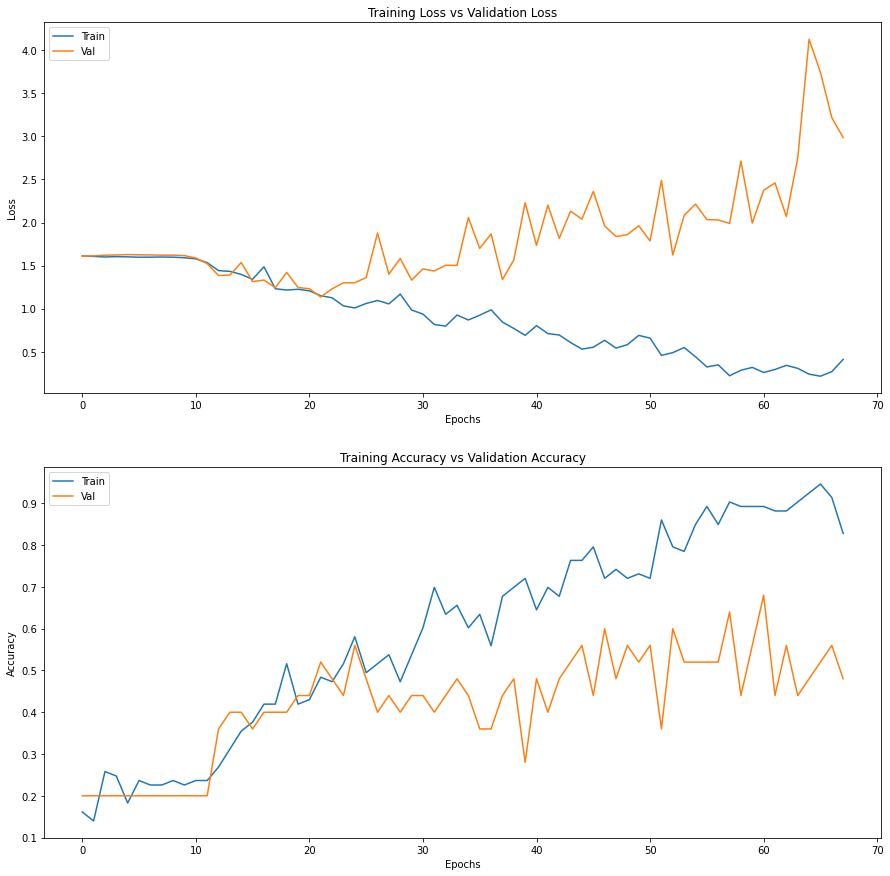

In [4]:
# Model evaluation

fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])